## Clasificación utilizando LightGBM (LGBM) (Core)

**Objetivo**

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando LightGBM (LGBM). Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset:** Loan Prediction Dataset

**Descripción del Dataset:** El dataset de predicción de préstamos contiene información sobre solicitantes de préstamos, como sus ingresos, historial crediticio y otras características personales. El objetivo es predecir si un solicitante será aprobado para un préstamo basándose en estos factores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Instrucciones:

#### Parte 1: Carga y Exploración Inicial de Datos

1. Carga del Dataset:

- Cargar el dataset desde Kaggle.


In [2]:
#cargar el dataset y revisar su estructura
df = pd.read_csv("../data/train.csv")

2. Exploración Inicial:

- Revisar la estructura del dataset.
- Describir las variables y su distribución.
- Identificar y documentar valores faltantes y outliers.


In [3]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#Calculamos los valores nulos 

def calculate_na_statistics(df: pd.DataFrame):
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na = pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %', ascending=False)

null_values = calculate_na_statistics(df)
null_values

,datos sin NAs en q,Na en q,Na en %
Credit_History,564,50,8.14
Self_Employed,582,32,5.21
LoanAmount,592,22,3.58
Dependents,599,15,2.44
Loan_Amount_Term,600,14,2.28
Gender,601,13,2.12
Married,611,3,0.49
Education,614,0,0.00
ApplicantIncome,614,0,0.00
CoapplicantIncome,614,0,0.00



### Parte 2: Análisis Exploratorio de Datos (EDA)

Análisis Estadístico Descriptivo:

Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
Analizar la distribución de las variables categóricas.

Visualizaciones:

Crear histogramas y gráficos de barras para entender la distribución de las variables.
Crear un mapa de calor para visualizar las correlaciones entre las variables.
Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

Valores Faltantes y Outliers:

Detectar y tratar valores faltantes.
Identificar y manejar outliers.
Parte 3: Preprocesamiento de Datos

Transformación de Columnas:

Codificar variables categóricas utilizando One-Hot Encoding.
Escalar características numéricas utilizando StandardScaler.

División del Conjunto de Datos:

Dividir el dataset en conjuntos de entrenamiento y prueba.

Parte 4: Implementación de LightGBM (LGBM)

Entrenamiento del Modelo:

Entrenar un modelo de LGBM con hiperparámetros básicos.
Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

Optimización de Hiperparámetros:

Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de LGBM.

Evaluación del Modelo Optimizado:

Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

In [37]:
#eliminamos la columna Id por ser irrelevante para predecir la calidad del vino
df.drop('Loan_ID', axis=1, inplace=True)
print('Sin la columna Id ',df.shape)

#buscamos y eliminamos duplicados si hubiese
# Identificación de valores duplicados
duplicados = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicados}')

# Eliminación de valores duplicados
df_train = df.drop_duplicates()

Sin la columna Id  (614, 12)
Número de registros duplicados: 0


In [39]:
#Codigo para detectar outliers usando el IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [40]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
ApplicantIncome,50.0,8.143322,150.0,10139.0
CoapplicantIncome,18.0,2.931596,0.0,5701.0
LoanAmount,39.0,6.351792,9.0,267.0
Loan_Amount_Term,88.0,14.332248,360.0,360.0
Credit_History,89.0,14.495114,1.0,1.0


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [42]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["No", "Yes"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
    ["n", "y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "No","no", "N", "n"]:
        return False

    if x in [1, 1.0, "true", "yes", "Yes", "si", "Y", "y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Gender': ['Male' 'Female']
Valores de columna 'Married': ['No' 'Yes']
La columna 'Married' es booleana. Será convertida.
Valores de columna 'Education': ['Graduate' 'Not Graduate']
Valores de columna 'Self_Employed': ['No' 'Yes']
La columna 'Self_Employed' es booleana. Será convertida.
Valores de columna 'Credit_History': [1. 0.]
La columna 'Credit_History' es booleana. Será convertida.
Valores de columna 'Loan_Status': ['Y' 'N']
La columna 'Loan_Status' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Married', 'Self_Employed', 'Credit_History', 'Loan_Status']


In [43]:
df.dtypes

Gender                object
Married                 bool
Dependents            object
Education             object
Self_Employed           bool
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History          bool
Property_Area         object
Loan_Status             bool
dtype: object

In [44]:
# convertir las columnas Object a category
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_variables] = df[categorical_variables].astype('category')

df.dtypes
# Codigo hecho por el profesor Iair Linker
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4
Gender,Male,Female,NaN,None,NaN
Married,False,True,None,None,NaN
Dependents,0,1,2,3+,NaN
Education,Graduate,Not Graduate,None,None,NaN
Self_Employed,False,True,None,None,NaN
Credit_History,True,False,None,None,NaN
Property_Area,Urban,Rural,Semiurban,None,NaN
Loan_Status,True,False,None,None,NaN


In [48]:
df.dtypes

Gender               category
Married                  bool
Dependents           category
Education            category
Self_Employed            bool
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History           bool
Property_Area        category
Loan_Status              bool
dtype: object

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


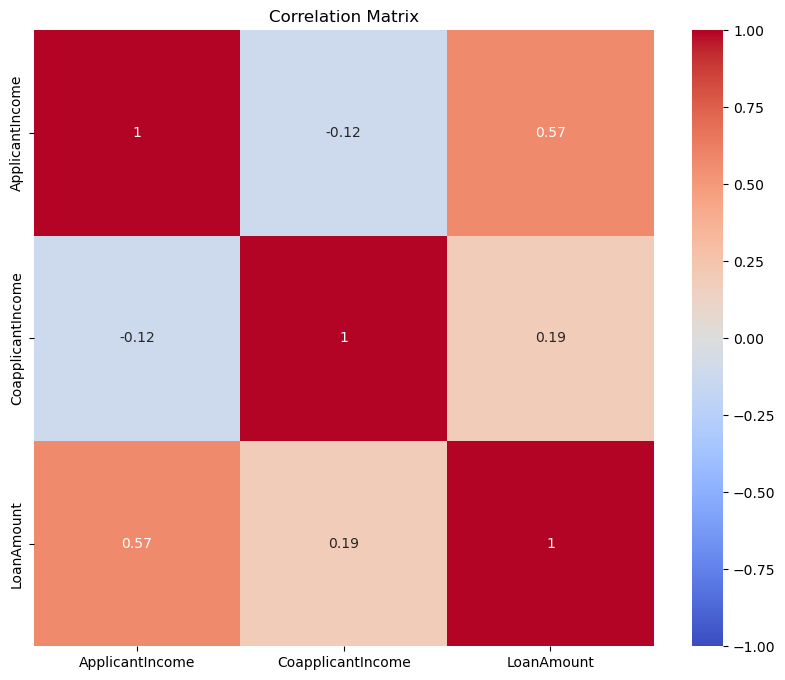

In [46]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
print(df[numerical_features].describe())

'''# Correlation with price for numeric features
correlations = {}
for feature in numerical_features:
    correlation = np.corrcoef(X[feature], y)[0, 1]
    correlations[feature] = correlation
'''
# calculate correlation with numerical_features
corr_matrix = df[numerical_features].corr(method='pearson')

    
'''# print correlation results
print("Correlation between price and numeric features:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation}")'''
    
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [60]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            614 non-null    bool    
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    bool    
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     614 non-null    bool    
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    bool    
dtypes: bool(4), category(4), float64(3), int64(1)
memory usage: 24.7 KB
None


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,False,0,Graduate,False,5849,0.0,NaN,360.0,True,Urban,True
1,Male,True,1,Graduate,False,4583,1508.0,128.0,360.0,True,Rural,False
2,Male,True,0,Graduate,True,3000,0.0,66.0,360.0,True,Urban,True
3,Male,True,0,Not Graduate,False,2583,2358.0,120.0,360.0,True,Urban,True
4,Male,False,0,Graduate,False,6000,0.0,141.0,360.0,True,Urban,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,False,0,Graduate,False,2900,0.0,71.0,360.0,True,Rural,True
610,Male,True,3+,Graduate,False,4106,0.0,40.0,180.0,True,Rural,True
611,Male,True,1,Graduate,False,8072,240.0,253.0,360.0,True,Urban,True
612,Male,True,2,Graduate,False,7583,0.0,187.0,360.0,True,Urban,True


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numerical_features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Inicializar modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}



# Almacenar métricas y tablas de contingencia
results = []
confusion_matrices = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Guardar resultados
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    })
    
    # Calcular y almacenar la matriz de confusión
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Mostrar resultados en formato tabular
df_results = pd.DataFrame(results)
print(df_results)


ValueError: Cannot cast object dtype to float32